## Data Build Tool (dbt)
"What is `dbt`, the data build tool?"

```
dbt (data build tool) is a specific tool used for data transformation and data modeling. It basically helps analysts and engineers to transform data in a scalable and collaborative way.
Some of the main features of dbt are:

It enables you to write SQL transformations for your data models. You write these transformations in .sql files, using a simple CLI.
It allows you to create and manage dependencies between data models. If model A depends on model B, dbt will automatically build B before building A.
It has a "staging area" and "target area" concept. You can deploy intermediate tables to the staging area, and final tables to the target area.
It handles schema testing, to validate that your transformed data models have the expected schema.
It supports SQL comments to add documentation to your models.
It has a CLI to develop locally, and deploy to a warehouse (like Redshift or Snowflake) with a single command.
It supports configurations to easily switch between environments (dev/test/prod)
It has a growing community and ecosystem of plugins and extensions.

Some of the reasons companies are using dbt are:

Gaining more control over ETL processes
Improving data modeling capabilities
Standardizing SQL coding practices
Adding documentation to data models
Handling dependencies between models in a graceful way
Scaling data transformation efforts in a team
Deploying data models atomically
Enabling schema testing
Facilitating dev/test/prod deployments

So in short, dbt is a tool that makes data transformation and modeling more robust, scalable and collaborative. It's a very useful tool for any data team dealing with large amounts of data and complex data models.
```

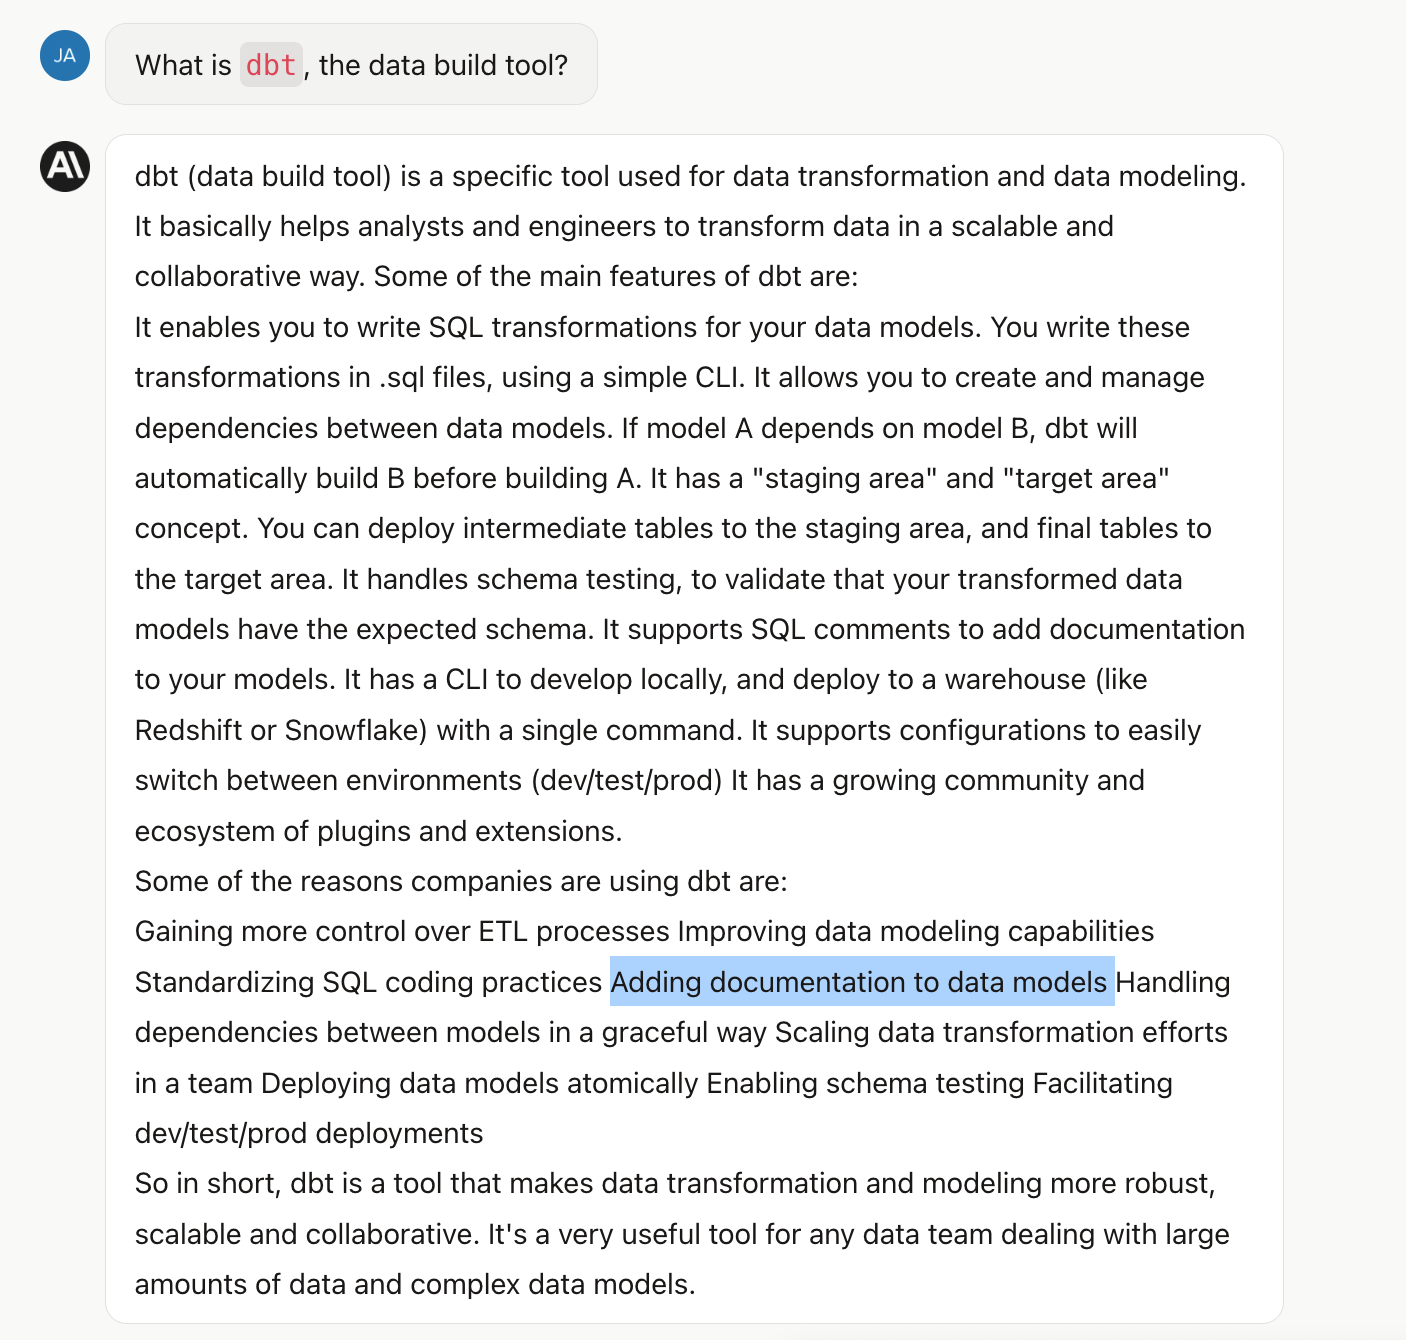

## The simplest dbt project

Run the following commands to create a new dbt project:
```
dbt init datathinking
cd datathinking
dbt run
```

Example of running it in this repository:

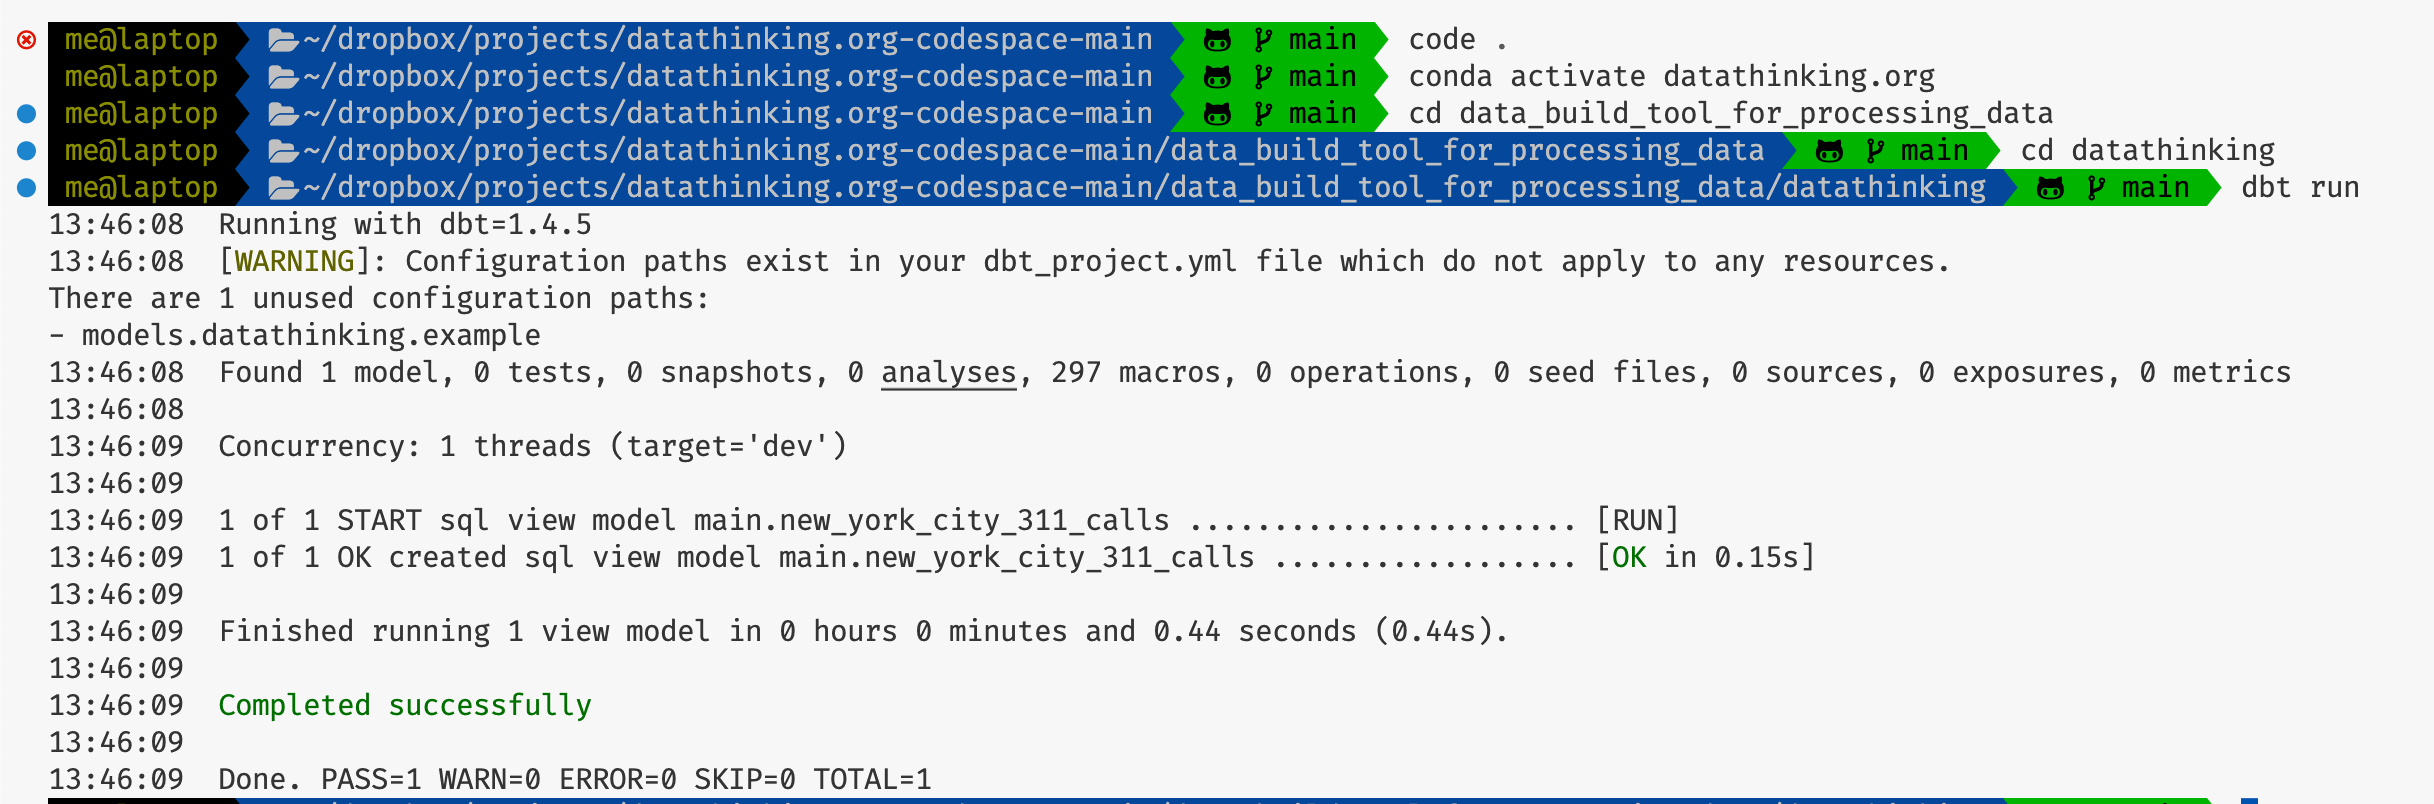

## dbt project structure

```
├── README.md
├── dbt_project.yml
├── data
│   └── seed.csv
├── models
│   └── new_york_city_311_calls.sql
└── profiles.yml
```

## dbt_project.yml

## profiles.yml

```yaml
datathinking:
  target: dev
  outputs:
    dev:
      type: duckdb
      path: /tmp/dbt.duckdb
      extensions:
        - httpfs
        - parquet
```

## models/new_york_city_311_calls.sql
<!-- 
```sql
{% set source('zulip', 'new_york_city_311_calls') as new_york_city_311_calls %}
select * from {{ new_york_city_311_calls }}
``` -->
```
SELECT * FROM read_csv_auto('/Users/me/Downloads/311_Service_Requests_from_2010_to_Present.csv') LIMIT 10
```

## dbt run
This will execute the data build tool using the data model defined in the `models/new_york_city_311_calls.sql` file.
```
$ dbt run
Running with dbt=0.19.1
Found 1 models, 0 tests, 0 snapshots, 0 analyses, 0 macros, 0 operations, 0 seed files, 0 sources, 0 exposures

11:20:15 | Concurrency: 1 threads (target='dev')
11:20:15 |
11:20:15 | 1 of 1 START view model datathinking.new_york_city_311_calls........... [RUN]
11:20:15 | 1 of 1 OK created view model datathinking.new_york_city_311_calls....... [SELECT 0 in 0.02s]
11:20:15 |
11:20:15 | Finished running 1 view model in 0.41s.
```

## What is duckdb?

GitHub Copilot:
```
DuckDB is an in-process SQL OLAP Database Management System. It is a column-oriented database management system with a focus on analytical (OLAP) queries. It is designed to be embedded in other applications and to be used as a library. DuckDB is written in C++ and has bindings for R, Python, and Java. DuckDB is released under the MIT license.
```

Claude

```
DuckDB is an open source SQL database management system. It has the following main characteristics:

It is an embedded database, meaning the library is linked into your application. There is no separate server process.
It is designed to be fast, lightweight and easy to embed in applications.
It uses a unique storage model based on append-only data files and snapshot isolation. This makes it very suitable for OLAP and data warehousing workloads.
It supports standard SQL, with most of the features of PostgreSQL supported.
It has good support for window functions, common table expressions and other SQL features suited for analytics.
It can be used in-process or accessed over a TCP socket.
It has no configuration - it is ready to use with just a few function calls.
It supports SQL APIs through ODBC, JDBC and PHP drivers.
It has NumPy integration, you can directly pass NumPy arrays as queries/results.
It is ACID transactional, with snapshot isolation.
It is quite small, the core library is just a few hundred KB.
It is written in C and has a C API, but has bindings for other languages as well.

Some of the main use cases for DuckDB are:

Embedded analytics/reporting in applications
Low latency OLAP queries
Prototyping/testing SQL queries fast
ACID storage for small projects
In-process caching/materialization of data
A lightweight SQL engine for languages like Python and JavaScript
Querying in-memory NumPy arrays using SQL
Smallprojects where a full database system would be overkill

DuckDB tries to fill the gap between simple in-memory databases (like SQLite) and full featured database systems like PostgreSQL. It aims to be very lightweight and embeddable, but still provide sturdy SQL functionality with ACID guarantees.
It's a great option if you need more query capabilities than a simple key-value store, but find systems like PostgreSQL too heavy for your use case.


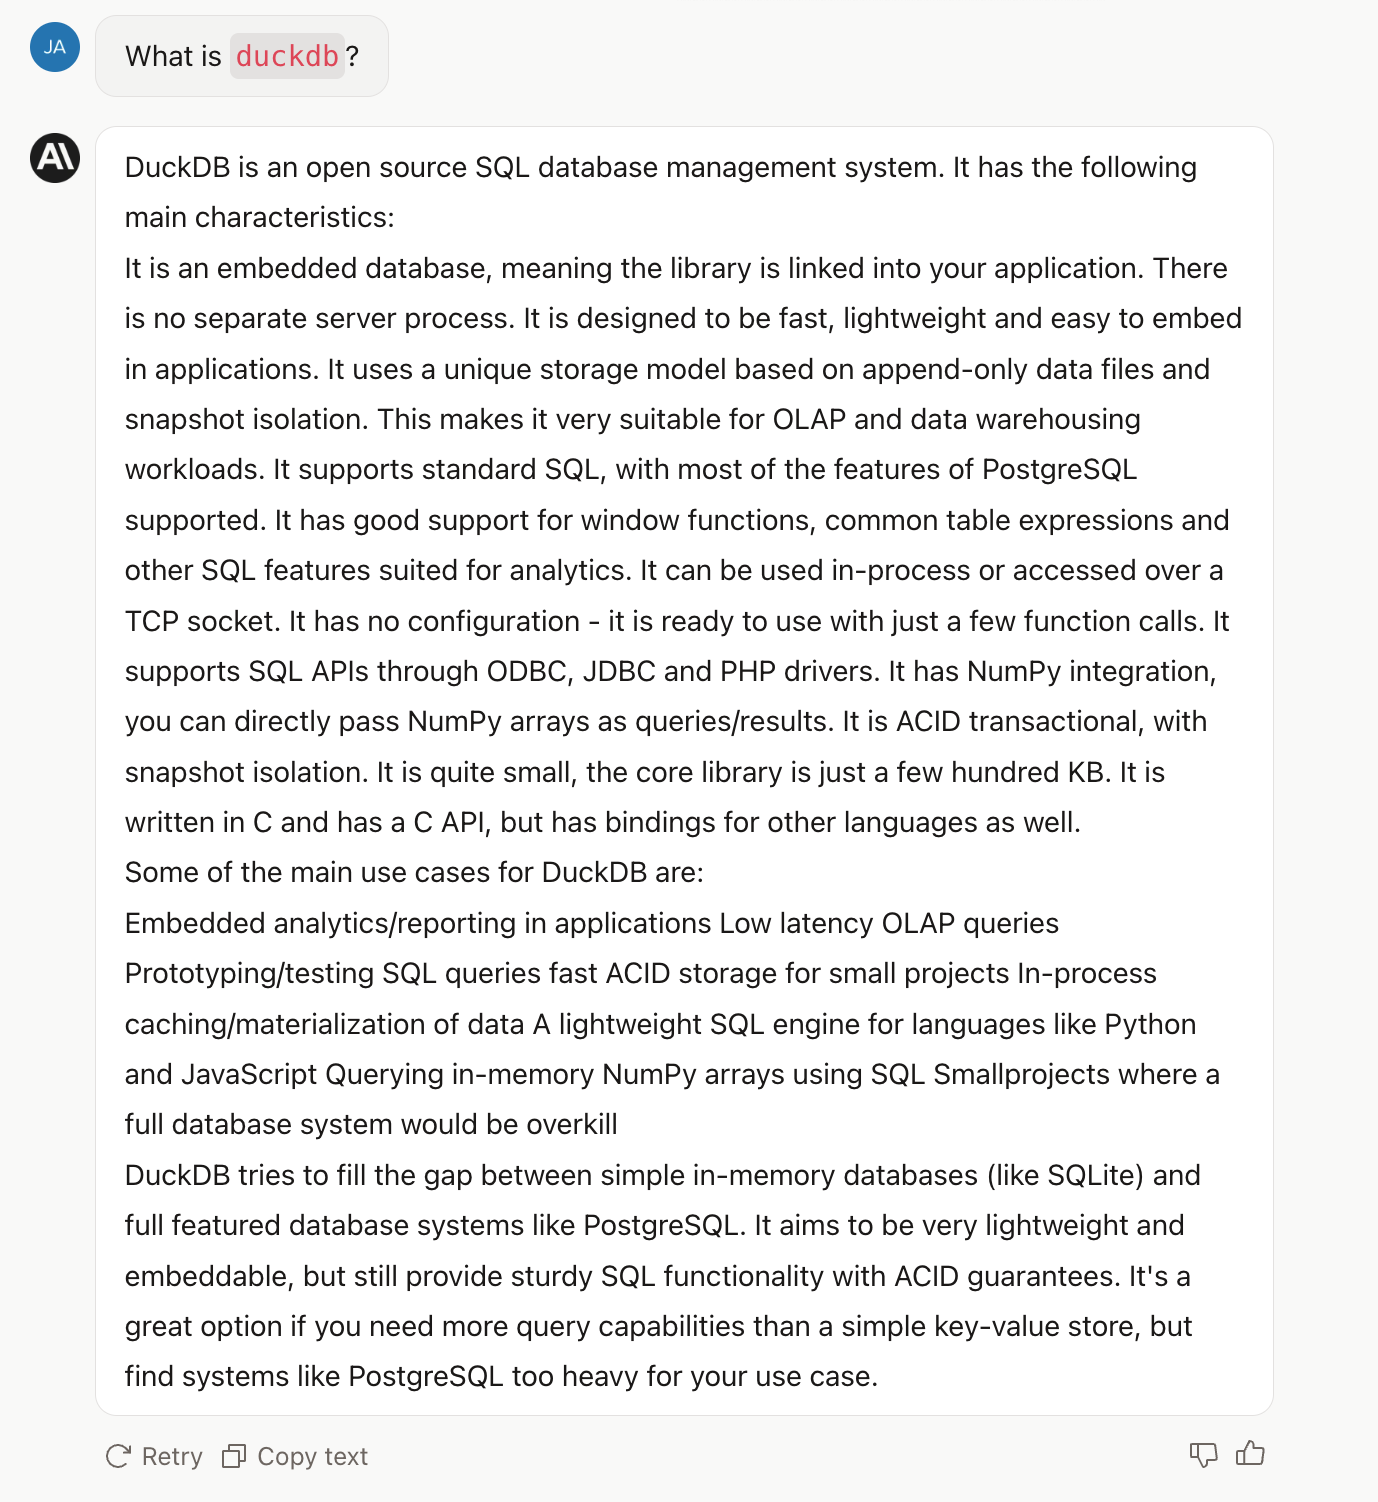

## Using duckdb with dbt

```
$ dbt run
Running with dbt=0.19.1
Found 1 models, 0 tests, 0 snapshots, 0 analyses, 0 macros, 0 operations, 0 seed files, 0 sources, 0 exposures

11:20:15 | Concurrency: 1 threads (target='dev')
11:20:15 |
11:20:15 | 1 of 1 START view model datathinking.new_york_city_311_calls........... [RUN]
11:20:15 | 1 of 1 OK created view model datathinking.new_york_city_311_calls....... [SELECT 0 in 0.02s]
11:20:15 |
11:20:15 | Finished running 1 view model in 0.41s.
```

## Quering the data in a jupyter notebook

```python
import duckdb
import pandas as pd

conn = duckdb.connect('/tmp/dbt.duckdb')
df = pd.read_sql('select * from datathinking.new_york_city_311_calls', conn)
df.head()
```


## Ran in the codespace folder

```zsh
 me@laptop   ~/dropbox/projects/datathinking.org-codespace-main/data_build_tool_for_processing_data/datathinking     main    dbt run                                                                                                               3427  10:46:54  
14:46:59  Running with dbt=1.4.5
14:46:59  [WARNING]: Configuration paths exist in your dbt_project.yml file which do not apply to any resources.
There are 1 unused configuration paths:
- models.datathinking.example
14:46:59  Found 1 model, 0 tests, 0 snapshots, 0 analyses, 297 macros, 0 operations, 0 seed files, 0 sources, 0 exposures, 0 metrics
14:46:59  
14:46:59  Concurrency: 1 threads (target='dev')
14:46:59  
14:46:59  1 of 1 START sql view model main.new_york_city_311_calls ....................... [RUN]
14:46:59  1 of 1 OK created sql view model main.new_york_city_311_calls .................. [OK in 0.15s]
14:46:59  
14:46:59  Finished running 1 view model in 0 hours 0 minutes and 0.43 seconds (0.43s).
14:46:59  
14:46:59  Completed successfully
14:46:59  
14:46:59  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1
```

In [1]:
import duckdb
import pandas as pd

conn = duckdb.connect("/tmp/dbt.duckdb")
df = pd.read_sql("select * from datathinking.new_york_city_311_calls", conn)
df.head()


/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_80593/3265350766.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from datathinking.new_york_city_311_calls', conn)


DatabaseError: Execution failed on sql: select * from datathinking.new_york_city_311_calls
Catalog Error: Table with name new_york_city_311_calls does not exist!
Did you mean "dbt.new_york_city_311_calls"?
LINE 1: select * from datathinking.new_york_city_311_calls
                      ^
unable to rollback

In [2]:
import duckdb

con = duckdb.connect("/tmp/dbt.duckdb")

con.execute("SELECT * FROM new_york_city_311_calls LIMIT 10").fetchall()


[(34247134,
  datetime.datetime(2016, 9, 4, 14, 35, 29),
  '09/07/2016 03:50:31 PM',
  'DPR',
  'Department of Parks and Recreation',
  'Maintenance or Facility',
  'Hours of Operation',
  'Beach',
  '11235',
  None,
  None,
  'W. 37TH STREET',
  'CORBIN PLACE',
  None,
  None,
  None,
  'BROOKLYN',
  None,
  'N/A',
  'Closed',
  '09/07/2016 02:35:29 PM',
  'The Department of Parks and Recreation has completed the requested work order and corrected the problem.',
  '09/07/2016 03:50:31 PM',
  'Unspecified BROOKLYN',
  None,
  'BROOKLYN',
  None,
  None,
  'PHONE',
  'Beach - Coney Island',
  'BROOKLYN',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (34250114,
  datetime.datetime(2016, 9, 5, 15, 47, 42),
  '09/07/2016 03:47:11 PM',
  'DOF',
  'Land Records',
  'DOF Property - Update Account',
  'Billing Name Incorrect',
  'Property Address',
  '11224',
  None,
  None,
  None,
  None,
  None,
  None,
  'ADDRESS',
  'BROOKLYN',
  None,
  'N/A',
  'Close

In [4]:
import duckdb
import pandas as pd

conn = duckdb.connect("/tmp/dbt.duckdb")
df = pd.read_sql("select * from new_york_city_311_calls", conn)
df.head()


/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_80593/3195384210.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from new_york_city_311_calls', conn)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,34247134,2016-09-04 14:35:29,09/07/2016 03:50:31 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Beach,11235,None,...,None,None,None,None,None,None,None,None,None,None
1,34250114,2016-09-05 15:47:42,09/07/2016 03:47:11 PM,DOF,Land Records,DOF Property - Update Account,Billing Name Incorrect,Property Address,11224,None,...,None,None,None,None,None,None,None,None,None,None
2,34249970,2016-09-05 15:56:00,09/12/2016 10:06:25 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,10027,None,...,None,None,None,None,None,None,None,None,None,None
3,27050693,2014-01-04 14:10:00,01/20/2014 09:50:00 AM,DOT,Department of Transportation,Traffic Signal Condition,LED Lense,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,34262636,2016-09-07 09:49:51,09/15/2016 07:00:28 PM,DOF,Refunds and Adjustments,DOF Property - Payment Issue,Property Refunds and Credits,Property Address,10014,None,...,None,None,None,None,None,None,None,None,None,None
